# Spotify Top Tracks of the Decade

##  In this exercise I decided to use a data set from Spotify that contained the top 50 songs for each year from 2010-2019.  As a musician I was curious to see what a hit song in 2020 might look like (and how to write one!), and also to test my hypothesis that popular songs are getting more sad sounding.  Then for fun I decided to see if I could use Machine Learning to make playlists based off of their feature characteristics.

### Import packages and read data into a dataframe

In [442]:
#first import of packages 

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

import sklearn
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

%matplotlib inline

In [443]:
df = pd.read_csv(r'/Users/sambrady/Datasets/top10s.csv', encoding = "ISO-8859-1")

df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [444]:
#Renaming the columns

df.rename(columns={'title':'Track Name','artist':'Artist Name','bpm':'Beats Per Minute','top genre':'Genre','nrgy':'Energy','dnce':'Danceability', 'dB':'Loudness dB','spch':'Speechiness','live':'Liveness','val':'Valence','dur':'Length','acous':'Acousticness','pop':'Popularity'},inplace=True)
df.head()

,Unnamed: 0,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


# Part 1 - EDA and Data Visualization

In [445]:
# The datatypes of the different columns

print(df.dtypes)

Unnamed: 0           int64
Track Name          object
Artist Name         object
Genre               object
year                 int64
Beats Per Minute     int64
Energy               int64
Danceability         int64
Loudness dB          int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object


In [446]:
# Get initial descriptive statistics on the columns

pd.set_option('precision', 3)
df.describe()

,Unnamed: 0,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000
mean,302.000,2014.592,118.546,70.504,64.380,-5.579,17.774,52.226,224.675,14.327,8.358,66.521
std,174.215,2.607,24.795,16.311,13.379,2.798,13.103,22.513,34.130,20.766,7.483,14.518
min,1.000,2010.000,0.000,0.000,0.000,-60.000,0.000,0.000,134.000,0.000,0.000,0.000
25%,151.500,2013.000,100.000,61.000,57.000,-6.000,9.000,35.000,202.000,2.000,4.000,60.000
50%,302.000,2015.000,120.000,74.000,66.000,-5.000,12.000,52.000,221.000,6.000,5.000,69.000
75%,452.500,2017.000,129.000,82.000,73.000,-4.000,24.000,69.000,239.500,17.000,9.000,76.000
max,603.000,2019.000,206.000,98.000,97.000,-2.000,74.000,98.000,424.000,99.000,48.000,99.000


## Categorical EDA with bar graphs to see most popular Artists, Genres, and Tracks

In [447]:
#Calculating the number of songs of each genre

print(type(df['Genre']))

popular_genre = df.groupby('Genre').size()

popular_genre = popular_genre.sort_values(ascending=False)

popular_genre

genre_list = df['Genre'].values.tolist()

genre_top20 = popular_genre[0:20,]

genre_top20 = genre_top20.sort_values(ascending=True)

genre_top20 = pd.DataFrame(genre_top20, columns = [ 'Number of Songs'])

genre_top20.head()

<class 'pandas.core.series.Series'>


,Number of Songs
Genre,
permanent wave,4
hip hop,4
latin,4
atl hip hop,5
edm,5


<function matplotlib.pyplot.show(*args, **kw)>

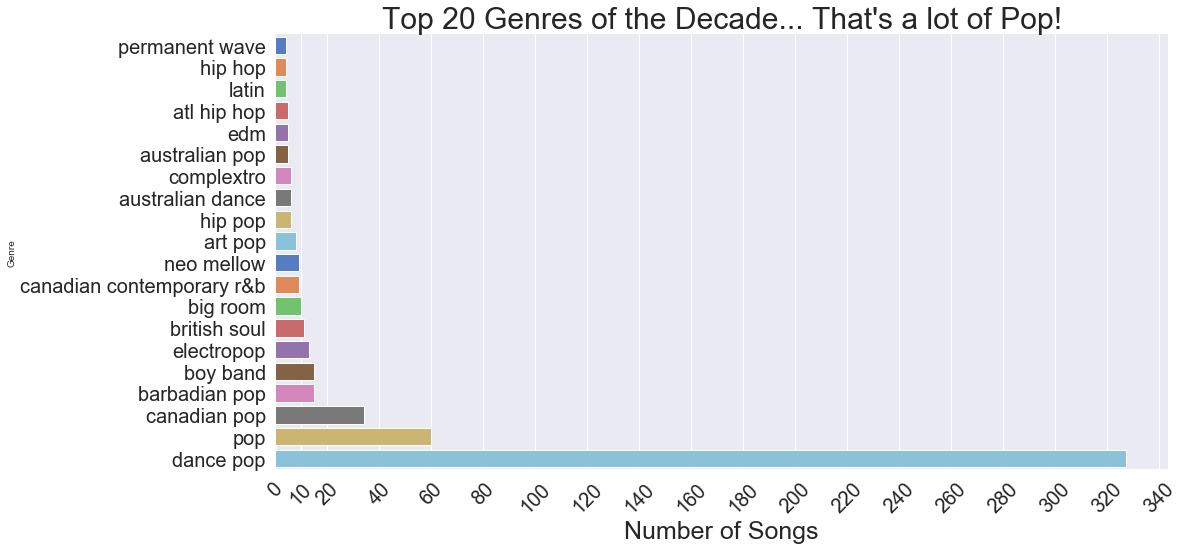

In [448]:
plt.figure(figsize=(16,8))


ax = sns.barplot(x = 'Number of Songs' , y = genre_top20.index , data = genre_top20, orient = 'h', palette = sns.color_palette("muted", 20), saturation = 0.8)

plt.title("Top 20 Genres of the Decade... That's a lot of Pop!",fontsize=30)
plt.xlabel('Number of Songs', fontsize=25)
plt.ylabel('Genre', fontsize=10)

xticks = [0, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340]

plt.xticks(xticks, size=20,rotation=45)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)


plt.show

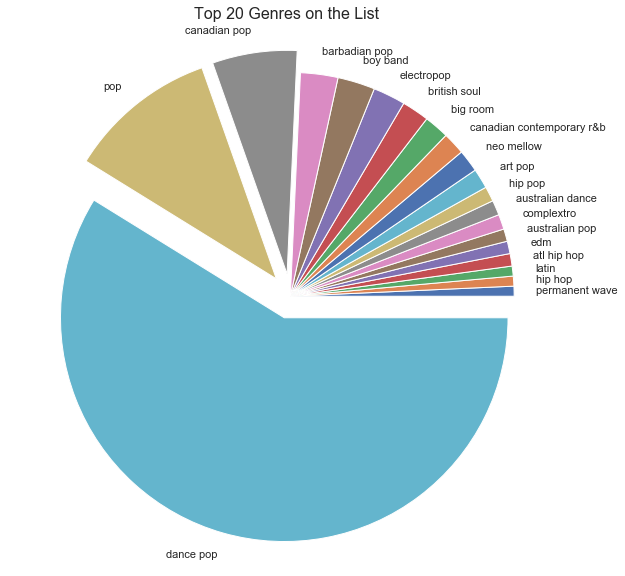

In [449]:
#Pie chart to show top 20 genres

labels = genre_top20.index
sizes = genre_top20.values

explode = (  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1)

plt.figure(figsize = (10,10))

plt.pie(sizes, labels = labels, explode = explode)

plt.title("Top 20 Genres on the List", fontsize=16)

autopct=('%1.1f%%')
plt.axis('equal')

plt.show()

In [450]:
#Calculating the least popular genres


genre_bot29 = popular_genre[21:,]

genre_bot29 = genre_bot29.sort_values(ascending=True)

genre_bot29 = pd.DataFrame(genre_bot29, columns = [ 'Number of Songs'])

genre_bot29.head()

,Number of Songs
Genre,
chicago rap,1
canadian latin,1
electro house,1
celtic rock,1
hollywood,1


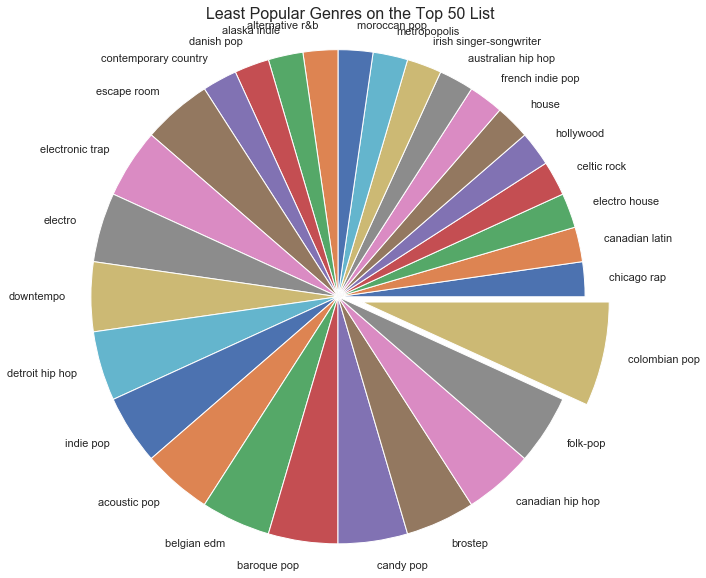

In [451]:
#Pie chart to show bottom 35 genres

labels = genre_bot29.index
sizes = genre_bot29.values

explode = ( 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

plt.figure(figsize = (10,10))

plt.pie(sizes, labels = labels, explode = explode)

plt.title("Least Popular Genres on the Top 50 List", fontsize=16)

autopct=('%1.1f%%')
plt.axis('equal')

plt.show()

In [452]:
#Calculating the number of songs by each of the artists


popular_artist = df.groupby('Artist Name').size()

popular_artist = popular_artist.sort_values(ascending=False)

popular_artist

artist_list=df['Artist Name'].values.tolist()

artist_top25 = popular_artist[0:25,]

artist_top25 = artist_top25.sort_values(ascending=True)

artist_top25 = pd.DataFrame(artist_top25, columns = [ 'Number of Songs'])

artist_top25.head() 

,Number of Songs
Artist Name,
DNCE,7
One Direction,7
Taylor Swift,8
Selena Gomez,8
Beyoncé,8


<function matplotlib.pyplot.show(*args, **kw)>

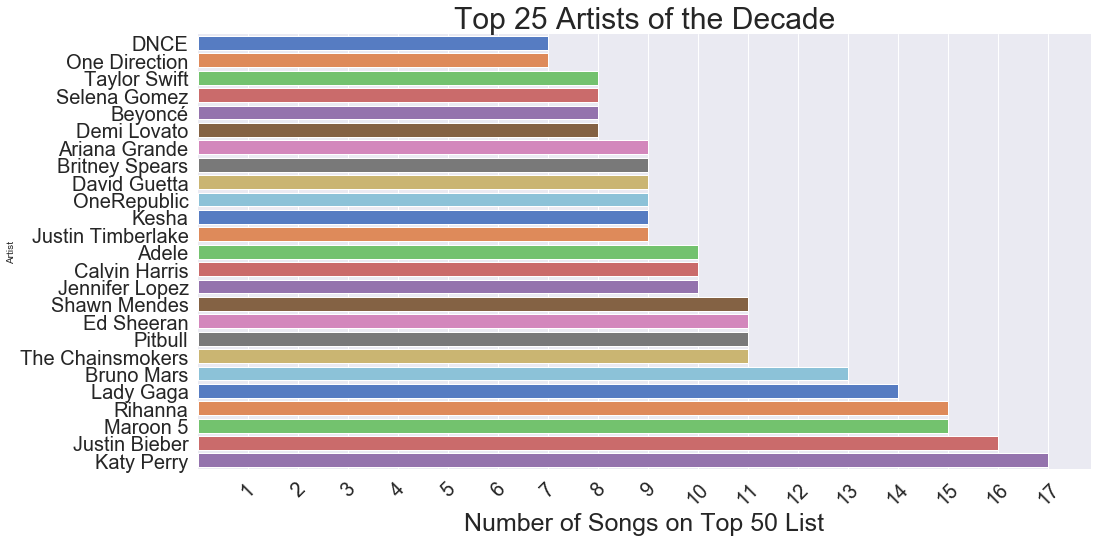

In [453]:
plt.figure(figsize=(16,8))


ax = sns.barplot(x = 'Number of Songs' , y = artist_top25.index , data = artist_top25, orient = 'h', palette = sns.color_palette("muted", 25), saturation = 0.8)

plt.title("Top 25 Artists of the Decade",fontsize=30)
plt.xlabel('Number of Songs on Top 50 List', fontsize=25)
plt.ylabel('Artist', fontsize=10)

xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

plt.xticks(xticks, size=20,rotation=45)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)


plt.show

<function matplotlib.pyplot.show(*args, **kw)>

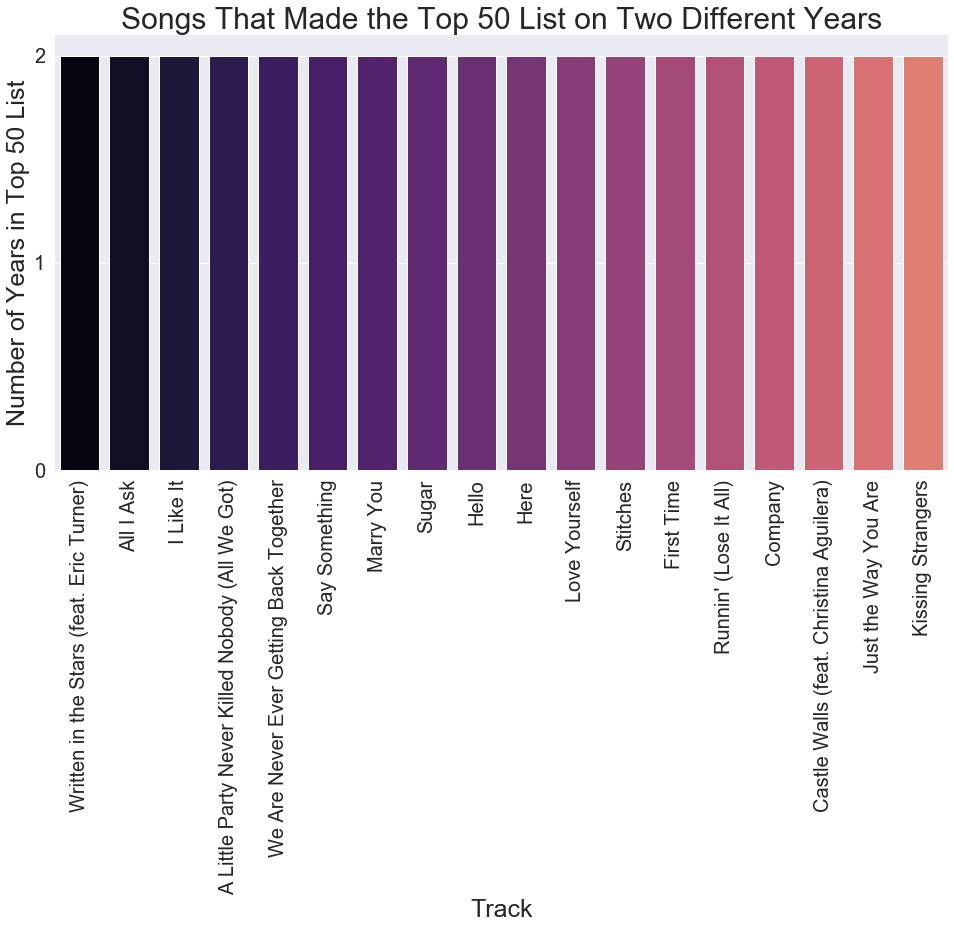

In [454]:
# Songs that made the top 50 list twice

plt.figure(figsize=(16,8))

tracks = pd.value_counts(df['Track Name']).iloc[:18].index

sns.countplot(df['Track Name'], order = tracks, orient = 'h', palette = sns.color_palette("magma", 25), saturation =0.7)

plt.title('Songs That Made the Top 50 List on Two Different Years',fontsize=30)
plt.xlabel('Track', fontsize=25)
plt.ylabel('Number of Years in Top 50 List', fontsize=25)

plt.xticks(size=20,rotation=90)
plt.yticks( [0, 1, 2]  , size=20)
sns.despine(bottom=True, left=True)


plt.show

## Investigating  bad data

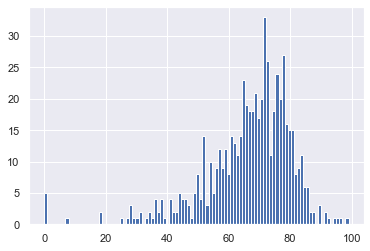

In [455]:
# Plotting a histogram to show the spread of Popularity since we notice some strange stats worth investigating

plt.hist(df['Popularity'],bins=100)

plt.show()

In [456]:
# Investigating low popularity

low_pop = df[df['Popularity'] <= 20]

low_pop

,Unnamed: 0,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
50,51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
103,104,Muny - Album Version (Edited),Nicki Minaj,dance pop,2011,98,72,80,-5,19,53,227,56,33,7
138,139,Blow Me (One Last Kiss),P!nk,dance pop,2012,114,92,60,-3,25,75,256,0,4,0
267,268,Not a Bad Thing,Justin Timberlake,dance pop,2014,86,73,59,-6,38,46,266,27,6,0
361,362,Dangerous,Jennifer Hudson,dance pop,2015,109,53,90,-5,8,65,255,0,5,18
362,363,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0
441,442,Behind Your Back,Nelly Furtado,canadian latin,2016,98,47,80,-10,7,69,228,25,4,18
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0


In [457]:
# Inspect bad data...  How can the popularity be 0 if these are top 50 songs?

df.loc[df['Popularity']==0]

,Unnamed: 0,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
50,51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
138,139,Blow Me (One Last Kiss),P!nk,dance pop,2012,114,92,60,-3,25,75,256,0,4,0
267,268,Not a Bad Thing,Justin Timberlake,dance pop,2014,86,73,59,-6,38,46,266,27,6,0
362,363,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0


In [458]:
# drop bad data

df = df.drop(df.index[[50, 138, 267, 362, 442]])

df = df.reset_index()

# check it's gone

df.iloc[[50, 138, 267, 362, 442]]

,index,Unnamed: 0,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
50,51,52,A Thousand Years,Christina Perri,dance pop,2011,139,41,42,-7,11,16,285,31,3,81
138,140,141,Wake Me Up,Avicii,big room,2013,124,78,53,-6,16,64,247,0,5,85
267,270,271,The Hills,The Weeknd,canadian contemporary r&b,2015,113,56,58,-7,14,14,242,7,5,84
362,366,367,Don't Let Me Down,The Chainsmokers,electropop,2016,160,87,53,-5,14,42,208,16,17,81
442,447,448,That's What I Like,Bruno Mars,pop,2017,134,56,85,-5,9,86,207,1,4,83


In [459]:
# clean up index

df = df.drop('index', axis=1)
df = df.drop('Unnamed: 0', axis=1)


df.head()

,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


# Part 2 - Statistical EDA, Normalization, and PCA

In [460]:
# Get descriptive statistics on the columns to see the change

pd.set_option('precision', 3)

df.describe()

,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000
mean,2014.602,118.651,70.589,64.527,-5.492,17.758,52.339,224.659,14.396,8.391,67.077
std,2.608,24.141,16.007,13.152,1.701,13.100,22.459,34.154,20.817,7.501,13.235
min,2010.000,43.000,4.000,23.000,-15.000,2.000,4.000,134.000,0.000,3.000,7.000
25%,2013.000,100.000,61.000,57.000,-6.000,9.000,35.000,202.000,2.000,4.000,60.000
50%,2015.000,120.000,74.000,66.000,-5.000,12.000,52.000,220.500,6.000,5.000,69.000
75%,2017.000,129.000,82.000,73.750,-4.000,24.000,69.000,239.000,17.000,9.000,76.000
max,2019.000,206.000,98.000,97.000,-2.000,74.000,98.000,424.000,99.000,48.000,99.000


In [461]:
# get df ready for scatter matrix

df_features = df.drop(df.columns[[0, 1, 2, 3]], axis =1)

df_features.head()

,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,97,89,67,-4,8,80,217,19,4,83
1,87,93,75,-5,52,64,263,24,23,82
2,120,84,76,-3,29,71,200,10,14,80
3,119,92,70,-4,8,71,295,0,4,79
4,109,84,64,-5,9,43,221,2,4,78


## Normalization of the data to get the values between 0 and 1 in order to help with  PCA and regression analysis

In [462]:
# Normalize the data with Min/Max

df_norm = df_features

scaler = MinMaxScaler() 

df_norm = scaler.fit_transform(df_norm)

df_norm = pd.DataFrame(df_norm, columns = df_features.columns)

df_norm.describe()

,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000
mean,0.464,0.708,0.561,0.731,0.219,0.514,0.313,0.145,0.120,0.653
std,0.148,0.170,0.178,0.131,0.182,0.239,0.118,0.210,0.167,0.144
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.350,0.606,0.459,0.692,0.097,0.330,0.234,0.020,0.022,0.576
50%,0.472,0.745,0.581,0.769,0.139,0.511,0.298,0.061,0.044,0.674
75%,0.528,0.830,0.686,0.846,0.306,0.691,0.362,0.172,0.133,0.750
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


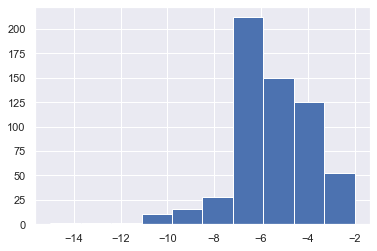

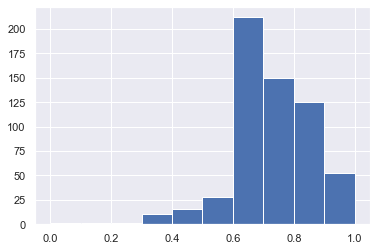

In [463]:
# Plotting a histogram to show the difference (note the x-axis)

plt.hist(df_features['Loudness dB'], bins=10)     #original data
plt.show()


plt.hist(df_norm['Loudness dB'], bins=10)          #standardized data
plt.show()

## PCA (Principle Component Analysis) to reduce the feature columns

In [464]:
#Fitting the PCA algorithm with our Data

pca = PCA().fit(df_norm)

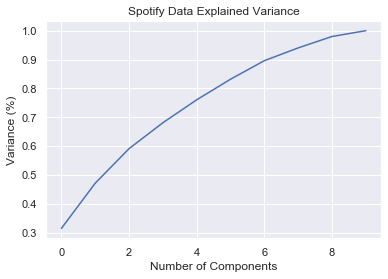

In [465]:
#Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Spotify Data Explained Variance')
plt.show()

In [466]:
# print the explained variance for each component

explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.31458694 0.15669507 0.11975973 0.08978314 0.07951685 0.0713788
 0.06426573 0.04430385 0.03961352 0.0200964 ]


In [467]:
# how much variance can be explained for 8 components

print('The explained variance for this many components is:  ',explained_variance[0:8].sum())

The explained variance for this many components is:   0.9402900879604094


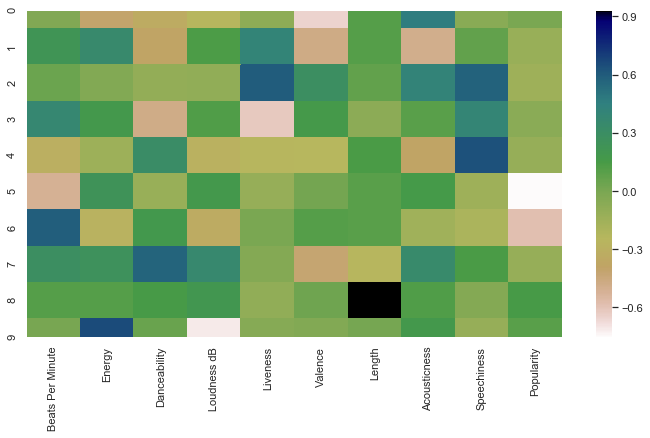

In [468]:
# visually inspect pca

map = pd.DataFrame(pca.components_, columns=df_norm.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map, cmap='gist_earth_r')

In [469]:
# choose number of components

pca = PCA(n_components = 8)

data_pca = pca.fit_transform(df_norm)

## Analyzing the features and their interdependencies

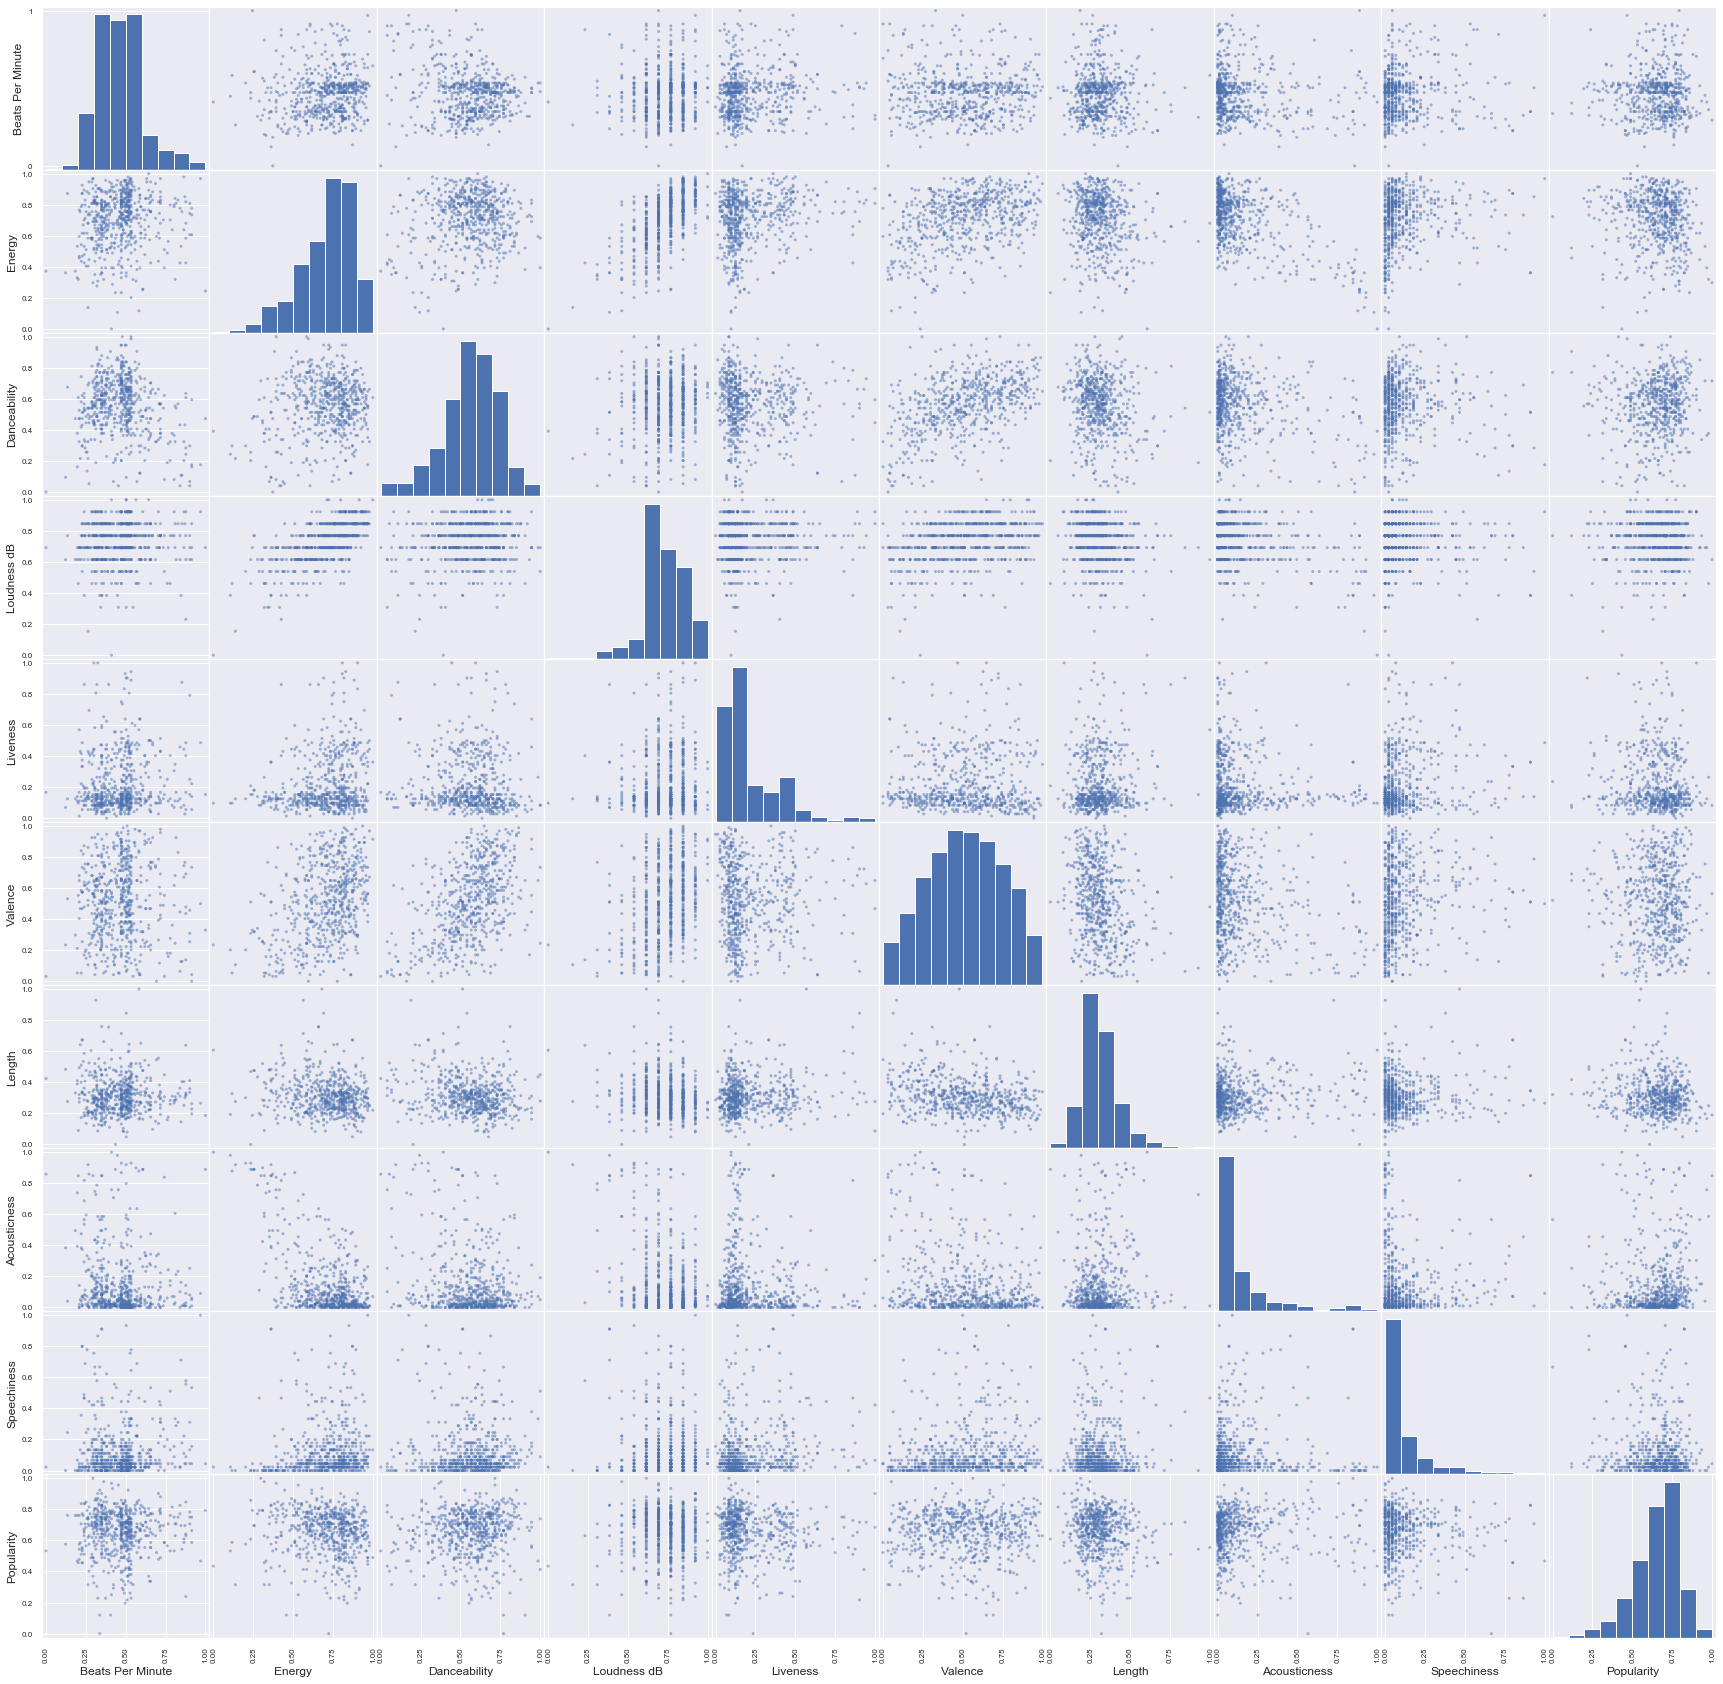

In [470]:
# Visualizing the relationship between all features

scatter_matrix(df_norm)

plt.gcf().set_size_inches(30, 30)

plt.show()

In [471]:
# Use a spearman correlation to measure the relationship between features

pd.set_option('display.width', 100)
pd.set_option('precision', 3)

correlation = df_norm.corr(method='spearman')

print(correlation)

                  Beats Per Minute  Energy  Danceability  Loudness dB  Liveness  Valence  Length  \
Beats Per Minute             1.000   0.145        -0.084        0.088     0.095    0.025   0.031   
Energy                       0.145   1.000         0.019        0.634     0.138    0.366  -0.141   
Danceability                -0.084   0.019         1.000        0.074    -0.103    0.481  -0.173   
Loudness dB                  0.088   0.634         0.074        1.000     0.057    0.324  -0.173   
Liveness                     0.095   0.138        -0.103        0.057     1.000   -0.060   0.062   
Valence                      0.025   0.366         0.481        0.324    -0.060    1.000  -0.265   
Length                       0.031  -0.141        -0.173       -0.173     0.062   -0.265   1.000   
Acousticness                -0.156  -0.340        -0.114       -0.168    -0.062   -0.185   0.042   
Speechiness                  0.053   0.219         0.085        0.063     0.120    0.185  -0.082   


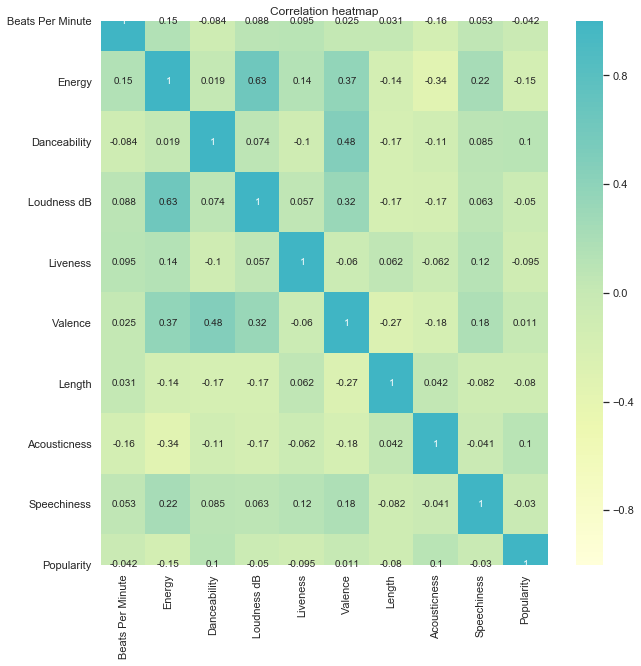

In [472]:
# heatmap of the correlation to visualize the relationships between features

plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')

sns.heatmap(correlation, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", center=1)

The spearman correlation is:   0.48133621845749974


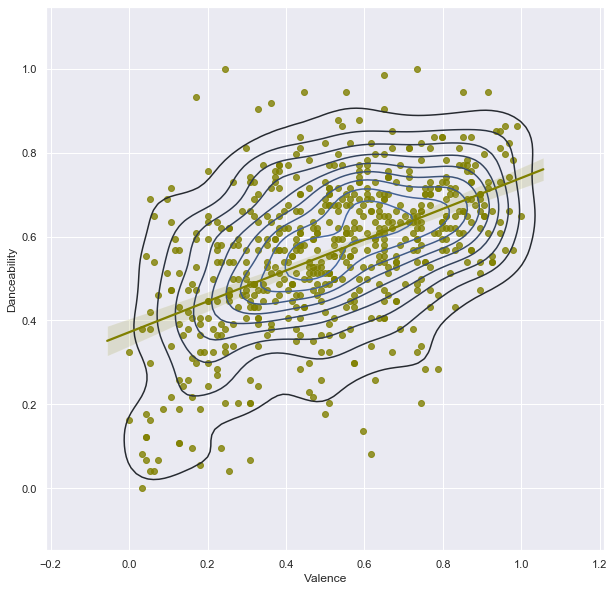

In [473]:
# Analysing the relationship between Danceablity and Valence

fig = plt.subplots(figsize = (10,10))

sns.regplot(x = 'Valence', y = 'Danceability', data = df_norm, color = 'olive')

sns.kdeplot(df_norm['Valence'], df_norm['Danceability'])

print('The spearman correlation is:  ',correlation['Danceability']['Valence'])

###  _**Happier songs are more danceable!**_

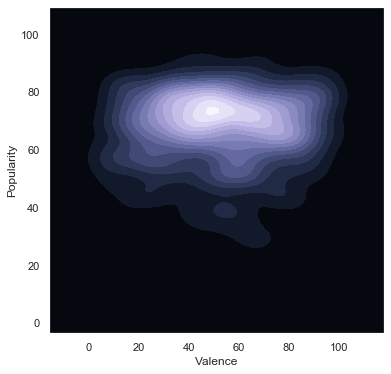

In [474]:
# Analysing the relationship between valence vs popularity


f, ax = plt.subplots(figsize=(6, 6))

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True, start=2.8, rot=.1)

sns.kdeplot(df['Valence'], df['Popularity'], cmap=cmap, n_levels=16, shade=True);

###  _**My hypothesis that popular songs are more depressing was wrong!**_

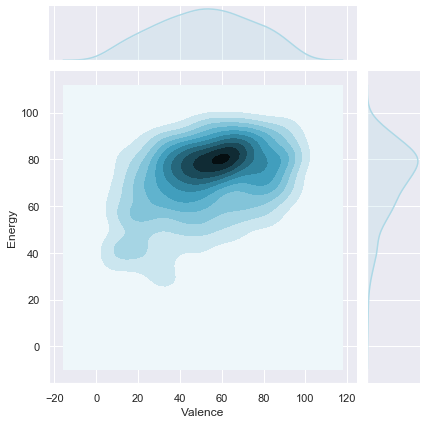

In [475]:
# Analysing the relationship between valence vs energy

sns.jointplot(x=df['Valence'], y=df['Energy'], data=df, kind="kde", color='lightblue');

###  _**Sadder songs do have less energy though!**_

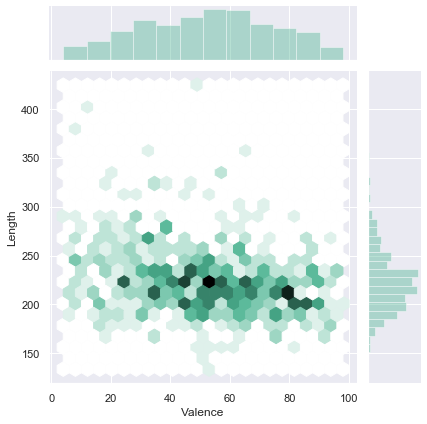

In [476]:
# Analysing the relationship between valence vs loudness


sns.jointplot(df['Valence'], df['Length'], kind="hex", color="#4CB391")

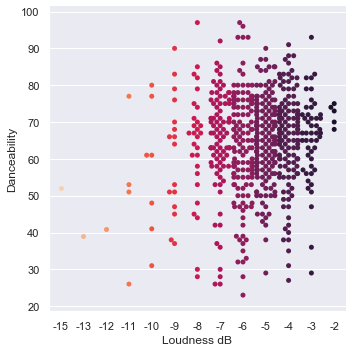

In [477]:
# Analysing the relationship between loudness vs danceability

sns.catplot(y="Danceability", x="Loudness dB", kind = "swarm", data = df_features, palette = 'rocket_r')

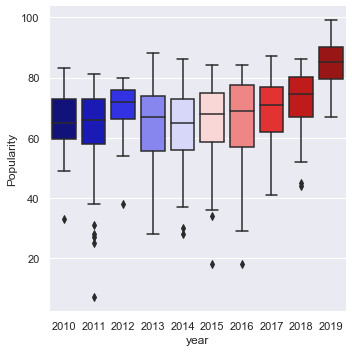

In [478]:
# Analysing the spread of popularity throught the years

sns.catplot(y = "Popularity", x = "year", kind = "box", data = df, palette = 'seismic')



###  _**The most recent songs are the most popular!  ...this makes me question the Popularity score**_

## Analyzing the trends over the years

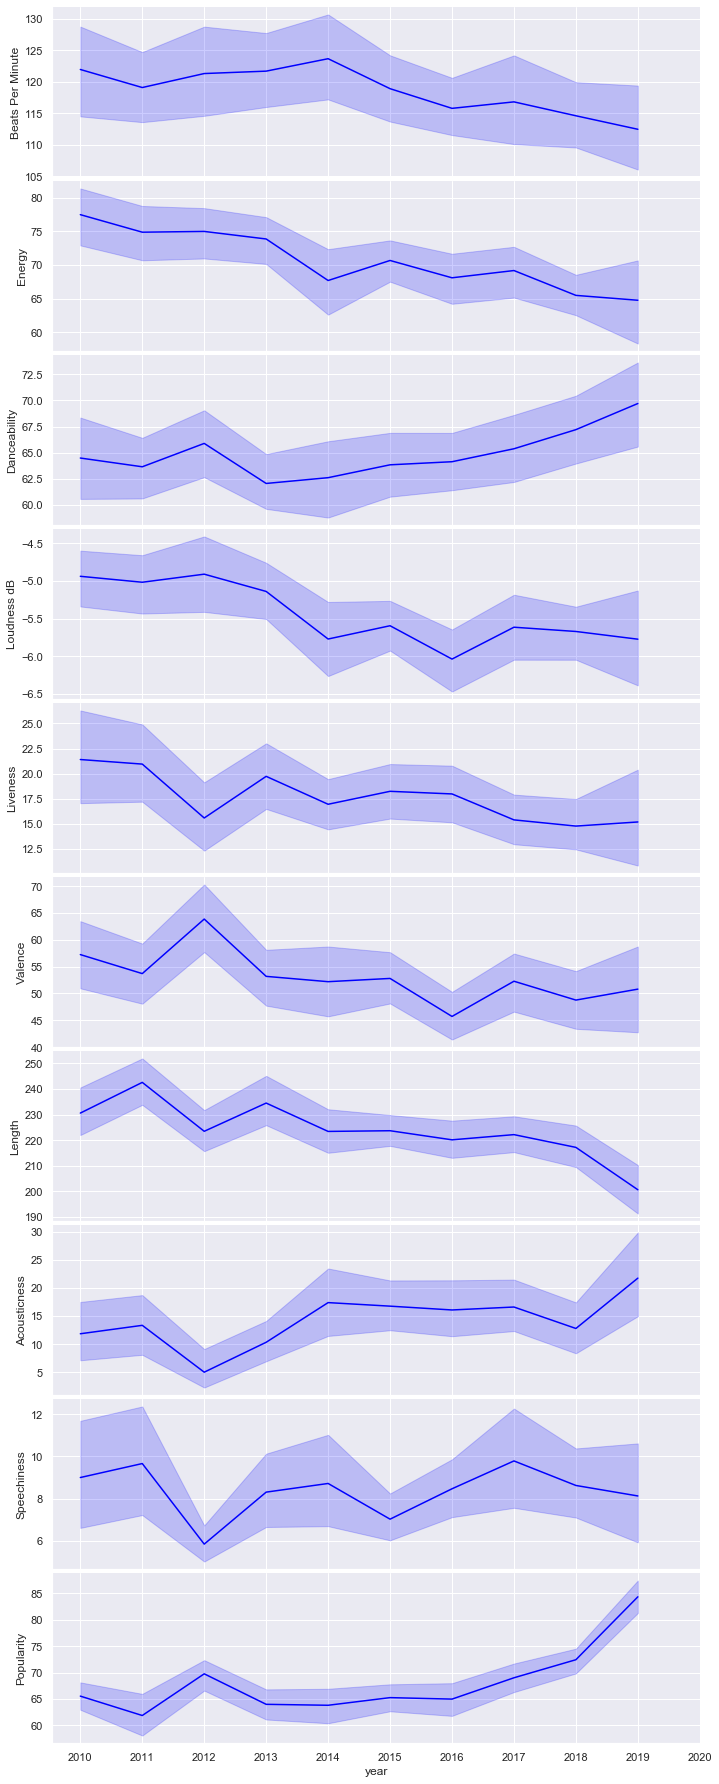

In [479]:
# PairGrid to analyze trends over the years

sns.set()

g = sns.PairGrid(df, y_vars = ['Beats Per Minute', 'Energy', 'Danceability', 'Loudness dB', 
                               'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'] , x_vars = ['year'], aspect = 4)

g = g.map(sns.lineplot, color="blue")

# Adjust the tick positions and labels

g.set(xticks=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])


# Adjust the arrangement of the plots

g.fig.subplots_adjust(wspace=.02, hspace=.02);

###  _**In general hit songs are getting slower, less energy, way more danceable, a little louder, slighly happier, way shorter, way more acoustic, with less lyrics!**_

# Part 3 - Multiple Linear Regression to make a prediction for 2020

In [480]:
# insert year cloumn into features df

df_features.insert(0, 'year', df['year'])


df_features.head()

,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,2010,97,89,67,-4,8,80,217,19,4,83
1,2010,87,93,75,-5,52,64,263,24,23,82
2,2010,120,84,76,-3,29,71,200,10,14,80
3,2010,119,92,70,-4,8,71,295,0,4,79
4,2010,109,84,64,-5,9,43,221,2,4,78


## Setup MLR model

In [481]:
# fit train and test a multiple linear regression


X = df_features[['year']]
y = data_pca

# can switch variable z to y to see effect of all features on predicition (also change y to z)
z = df_features[['Beats Per Minute', 'Energy', 'Danceability', 'Loudness dB', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity']]



# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Instantiate model
mlr = LinearRegression()


# Fit Model
mlr.fit(X_train, y_train)

# Predict
y_pred = mlr.predict(X_test)



## Scoring the model for accuracy

In [482]:
# RMSE

print('The Root Mean Squared Error is:  ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The Root Mean Squared Error is:   0.1957092459744931


In [483]:
# print the R-squared value for the model

print('The R-squared value is:  ',mlr.score(X, y))

The R-squared value is:   0.0176440948722163


## Predicition

In [484]:
# predict a hit song in 2020's features

hit = mlr.predict([[2020]])

hit

array([[ 0.03700102, -0.07633879, -0.06289392, -0.01557118,  0.03011486,
        -0.06275953, -0.04216416,  0.01443   ]])

In [485]:
# reverse pca

hit = pca.inverse_transform(hit)

hit

array([[0.43949287, 0.66234278, 0.60910818, 0.71475273, 0.15523971,
        0.48644923, 0.29532161, 0.16182595, 0.10751712, 0.73894905]])

In [486]:
# reverse normalization

hit = scaler.inverse_transform(hit)
    
hit

array([[114.63733862,  66.26022167,  68.07400545,  -5.70821445,
         13.17725881,  49.72622747, 219.64326557,  16.02076856,
          7.83827035,  74.98331286]])

## Finding a song from our data to serve as an exemplar for the predicted values by using the standard deviation of the predicited features

In [487]:
# make a prediction for 2020 using features corresponding std's to find an exemplar

# half of std values
std_bpm = 24/2
std_en = 16/2
std_dan = 13/2
std_loud = 1.7/2
std_live = 13/2
std_val = 22/2
std_len = 34/2
std_ac = 20/2
std_sp = 7/2



mlr_hit_2020 = df[((df['Beats Per Minute'] >  114 - std_bpm)     &   (df['Beats Per Minute'] <  114 + std_bpm)) 
                   & ((df['Energy'] >  66 - std_en)              &   (df['Energy'] <  66 + std_en))  
                   & ((df['Danceability'] >  68 - std_dan)       &   (df['Danceability'] <  68 + std_dan))
                   & ((df['Loudness dB'] >  -5.7 - std_loud)     &   (df['Loudness dB'] <  -5.7 + std_loud))
                   & ((df['Liveness'] >  13 - std_live)          &   (df['Liveness'] <  13 + std_live))
                   & ((df['Valence'] >  50 - std_val)            &   (df['Valence'] <  50 + std_val))
                   & ((df['Length'] >  220 - std_len)            &   (df['Length'] <  220 + std_len ))
                   & ((df['Acousticness'] >  16 - std_ac)        &   (df['Acousticness'] <  16 + std_ac))
                   & ((df['Speechiness'] >  8 - std_sp)          &   (df['Speechiness'] <  8 + std_sp))    ] 

mlr_hit_2020



,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
388,Close,Nick Jonas,dance pop,2016,124,62,65,-5,14,40,234,25,8,72


## Finding a song from our data to serve as an exemplar for the predicted values by usingthe machine learning technique, K-Nearest Neighbor Classifier

In [488]:
# get the features of the prediciton into a dataframe

hit = pd.DataFrame(hit)

hit = hit.drop(columns = 9, axis=1)

hit


,0,1,2,3,4,5,6,7,8
0,114.637,66.26,68.074,-5.708,13.177,49.726,219.643,16.021,7.838


In [489]:
# make a prediction for 2020 using the machine learning classifier KNN


knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(df_features[['Beats Per Minute','Energy','Danceability','Loudness dB','Liveness','Valence', 'Length', 'Acousticness', 'Speechiness']], df_features.index)

y_pred = knn.predict(hit)

y_pred = pd.DataFrame(y_pred)

y_pred

,0
0,421


In [490]:
# look up the index

winner = df.iloc[[421]]

winner

,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
421,Make Me... (feat. G-Eazy),Britney Spears,dance pop,2016,123,70,70,-7,22,58,231,16,10,53


##  _**There you have it... Two different songs to guide you on writting a hit song in 2020.**_  

##  _**And again, in 2020 hit songs are getting slower, less energy, way more danceable, a little louder, slighly happier, way shorter, way more acoustic, with less lyrics!**_

### _**1.          Make Me by Britney Spears as selected by Machine Learning.**_

### _**2. Close by Nick Jonas as selected by me, a human.**_

# Part 4 - Make Playlists based off of the feature characteristics using Machine Learning technique K-Means Clustering

## Standardization of the data to fix skew and get mean=0 and std=1 in order to help with clustering


In [491]:
# Finding out the skew for each feature

skew = df_features.skew()

print(skew)

year               -0.188
Beats Per Minute    0.707
Energy             -0.923
Danceability       -0.554
Loudness dB        -0.999
Liveness            1.733
Valence            -0.068
Length              1.348
Acousticness        2.196
Speechiness         2.534
Popularity         -0.960
dtype: float64


In [492]:
# scale the data

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_features)

df_scaled = pd.DataFrame(df_scaled)

df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.766,-0.898,1.151,0.188,0.878,-0.745,1.233,-0.224,0.221,-0.586,1.204
1,-1.766,-1.312,1.401,0.797,0.289,2.616,0.520,1.124,0.462,1.949,1.129
2,-1.766,0.056,0.839,0.873,1.466,0.859,0.832,-0.723,-0.211,0.748,0.977
3,-1.766,0.014,1.339,0.416,0.878,-0.745,0.832,2.061,-0.692,-0.586,0.902
4,-1.766,-0.400,0.839,-0.040,0.289,-0.669,-0.416,-0.107,-0.596,-0.586,0.826


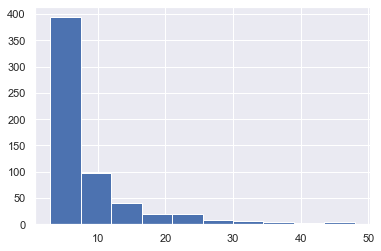

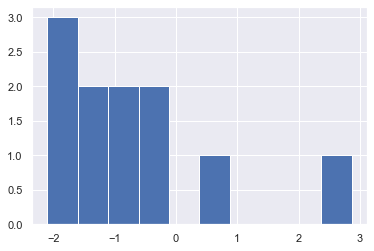

In [493]:
# Plot to show the difference

plt.hist(df_features['Speechiness'], bins=10)                    #original data
plt.show()

plt.hist(df_scaled.iloc[8], bins=10)                            #standardized data
plt.show()

## Find the appropriate amount of clusters


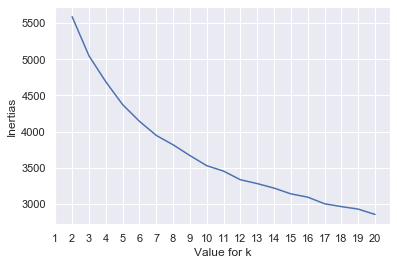

In [495]:
# choose the best number of clusters using elbow method and inertia

k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

inertias = []

for i in k:
    km = KMeans(n_clusters=i, max_iter=1000, random_state=42)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

plt.plot(k, inertias)
plt.xlabel("Value for k")
plt.ylabel("Inertias")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

plt.show()

In [496]:
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

score=[]

for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    score.append(silhouette_score(df_scaled, kmeans.labels_))
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.2176
Silhouette Score for 3 Clusters: 0.1187
Silhouette Score for 4 Clusters: 0.1168
Silhouette Score for 5 Clusters: 0.1205
Silhouette Score for 6 Clusters: 0.1087
Silhouette Score for 7 Clusters: 0.1082
Silhouette Score for 8 Clusters: 0.1073
Silhouette Score for 9 Clusters: 0.1059
Silhouette Score for 10 Clusters: 0.1019
Silhouette Score for 11 Clusters: 0.1049
Silhouette Score for 12 Clusters: 0.1110
Silhouette Score for 13 Clusters: 0.0976
Silhouette Score for 14 Clusters: 0.1059
Silhouette Score for 15 Clusters: 0.1027
Silhouette Score for 16 Clusters: 0.1045
Silhouette Score for 17 Clusters: 0.0906
Silhouette Score for 18 Clusters: 0.1019
Silhouette Score for 19 Clusters: 0.1071
Silhouette Score for 20 Clusters: 0.0891


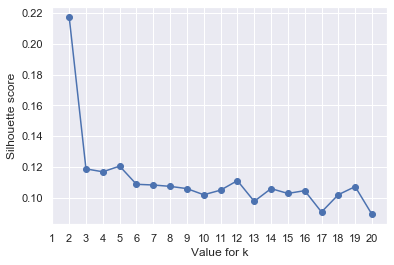

In [497]:
# plot cluster options

plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

plt.show()

In [498]:
# set number of clusters

kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=42).fit(df_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 3, 1, 1, 1, 1, 1, 2, 0, 1], dtype=int32)

In [499]:
# add clustering labels to dataframe

df.insert(0, 'Playlist Number', kmeans.labels_)

df.head()    # check out the Cluster Labels column!

,Playlist Number,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,3,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,1,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,1,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,1,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Playlist #1

In [500]:
df.loc[df['Playlist Number'] == 0, df.columns[[0, 1, 2]]]

,Playlist Number,Track Name,Artist Name
8,0,Empire State of Mind (Part II) Broken Down,Alicia Keys
36,0,Bound To You - Burlesque Original Motion Pictu...,Christina Aguilera
44,0,You Lost Me,Christina Aguilera
50,0,A Thousand Years,Christina Perri
51,0,Someone Like You,Adele
86,0,1+1,Beyoncé
93,0,Jar of Hearts,Christina Perri
95,0,Turning Page,Sleeping At Last
146,0,Wrecking Ball,Miley Cyrus
184,0,Clown,Emeli Sandé


## Playlist #2

In [501]:
df.loc[df['Playlist Number'] == 1, df.columns[[0, 1, 2]]]

,Playlist Number,Track Name,Artist Name
0,1,"Hey, Soul Sister",Train
2,1,TiK ToK,Kesha
3,1,Bad Romance,Lady Gaga
4,1,Just the Way You Are,Bruno Mars
5,1,Baby,Justin Bieber
...,...,...,...
475,1,Came Here for Love,Sigala
478,1,Cut To The Feeling,Carly Rae Jepsen
489,1,Touch (feat. Kid Ink),Little Mix
493,1,Rich Boy,Galantis


## Playlist #3

In [502]:
df.loc[df['Playlist Number'] == 2, df.columns[[0, 1, 2]]]

,Playlist Number,Track Name,Artist Name
7,2,Secrets,OneRepublic
15,2,OMG (feat. will.i.am),Usher
17,2,The Time (Dirty Bit),The Black Eyed Peas
18,2,Alejandro,Lady Gaga
20,2,Meet Me Halfway,The Black Eyed Peas
...,...,...,...
551,2,What About Us,P!nk
553,2,2U (feat. Justin Bieber),David Guetta
560,2,Never Be the Same - Radio Edit,Camila Cabello
596,2,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson


## Playlist #4

In [503]:
df.loc[df['Playlist Number'] == 3, df.columns[[0, 1, 2]]]

,Playlist Number,Track Name,Artist Name
1,3,Love The Way You Lie,Eminem
14,3,Like A G6,Far East Movement
33,3,Imma Be,The Black Eyed Peas
40,3,Something's Got A Hold On Me - Burlesque Origi...,Christina Aguilera
48,3,Castle Walls (feat. Christina Aguilera),T.I.
74,3,Sexy And I Know It,LMFAO
94,3,Castle Walls (feat. Christina Aguilera),T.I.
96,3,Super Bass,Nicki Minaj
99,3,Moment 4 Life - Album Version (Edited),Nicki Minaj
102,3,Muny - Album Version (Edited),Nicki Minaj


## Playlist #5

In [504]:
df.loc[df['Playlist Number'] == 4, df.columns[[0, 1, 2]]]

,Playlist Number,Track Name,Artist Name
108,4,I Knew You Were Trouble.,Taylor Swift
109,4,Call Me Maybe,Carly Rae Jepsen
112,4,We Are Never Ever Getting Back Together,Taylor Swift
122,4,Boyfriend,Justin Bieber
140,4,Just Give Me a Reason (feat. Nate Ruess),P!nk
...,...,...,...
590,4,Antisocial (with Travis Scott),Ed Sheeran
591,4,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)",DJ Snake
592,4,Con Calma - Remix,Daddy Yankee
593,4,Find U Again (feat. Camila Cabello),Mark Ronson


# Now all we have to do is name these playlists... I'll leave that up to you!